# Capítulo 9

In [114]:
import numpy as np
import pandas as pd
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Ejercicio 1

### Cálculo manual

In [115]:
x = [1, 2, 3, 4, 5]
y = [5, 3, 4, 2, 1]

# Calculamos la r de Pearson entre las variables
df = pd.DataFrame({'X': x, 'Y':y})
r_pearson = df['X'].corr(df['Y'])
print(round(r_pearson, 2))

-0.9


In [116]:
# Ahora calculamos los desvíos estándares

s_x = statistics.pstdev(x)
s_y = statistics.pstdev(y)

print(round(s_x, 2))
print(round(s_y, 2))

1.41
1.41


In [117]:
# Calculamos la pendiente (B1)

b1 = r_pearson * (s_y / s_x)
print(round(b1, 2))

-0.9


In [118]:
# Por último, calculamos el intercepto

intercepto = np.mean(y) - b1*np.mean(x)
print(round(intercepto, 2))

5.7


### Cálculo con Sklearn

Python ofrece dos módulos para calcular una regresión lineal, Sklearn y Statsmodels.

En el caso Sklearn, al principio importamos una instancia o clase, llamdada *LinearRegression*. Esta 'enmarca' al modelo como una regresión por mínimos cuadrados ordinarios (OLS).

Como toda clase (objeto) tiene métodos (funciones), que son funciones que nos ayudan a calcular las estimaciones de los coeficientes de la recta de regresión.

La función *fit()* toma como argumentos toma arrays con los datos originales y devuelve la misma clase (un modelo de regresión lineal) pero ajustado a los datos que le pasamos. Con esta función 'entrenamos' al modelo.



In [119]:
# Crear el modelo
modelo = LinearRegression()

x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)

# Entrenar el modelo
modelo.fit(x, y)

LinearRegression()

### ¿Qué es *reshape*?

Esta función de Numpy convierte un array de 1 dimensión en una de dos dimensiones. Ver Manejo_de_Series_y_DataFrames para más información.

Para regresiones multinomiales, *reshape* no es necesario.

Solo a partir de la ejecución de *fit()* podemos obtener los estadísticos

In [120]:
# Evaluar el modelo
print(f"Pendiente (coeficiente): {round(modelo.coef_[0], 2)}")
print(f"Intersección (ordenada al origen): {round(modelo.intercept_, 2)}")

Pendiente (coeficiente): -0.9
Intersección (ordenada al origen): 5.7


*.coef_* es un array que contiene todos los coeficientes de cada variable. En este caso, como solo ingresamos una variable independiente, el *lengh* del array es 1. Mediante *modelo_coef_* obtenemos el número en sí en lugar de imprimir todo el array

*intercept_* es un float que marca el intercepto.

### Cálculo con Statsmodel

Statsmodels no agrega automáticamente el intercepto, así que debe hacerse manualmente con una función de *sm*, que devuelve un array.

Se puede pasar una matriz (de algún objeto cualquiera, array, Series, DataFrame) con más de una variable. En este caso, como es una regresión bivariada, solo pasamos una fila de números.

In [121]:
x_con_nuevos_datos = sm.add_constant(x)  # Esto agrega una columna de unos como primer columna
x_con_nuevos_datos


array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

Ahora creamos y entrenamos el modelo

Del módulo *sm* se importa la instancia OLS. Al crear el modelo, primero debe ir la variable dependiente o endógena y en segundo lugar la independiente o exógena.

En el caso de la variable independiente, se debe ingresar como argumento de la función el array con la columna de unos agregada

In [122]:
# Crear modelo
modelo_con_sm = sm.OLS(y, x_con_nuevos_datos)

# Entrenamos el modelo
resultado = modelo_con_sm.fit()

Para visualizar los coeficientes tenemos dos opciones:

- a) Imprimir una salida estandarizada que contiene varios estadísticos importantes sobre el ajuste y calidad de datos del modelo. Esto no se trata en este capítulo del libro.

In [123]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     12.79
Date:                Tue, 29 Jul 2025   Prob (F-statistic):             0.0374
Time:                        17:13:14   Log-Likelihood:                -4.6757
No. Observations:                   5   AIC:                             13.35
Df Residuals:                       3   BIC:                             12.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7000      0.835      6.829      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


- b) Imprimir los coeficientes.

In [124]:
print(f"Coeficientes:\n   Intercepto: {round(resultado.params[0], 2)}, \n   B1: {round(resultado.params[1], 2)}")


Coeficientes:
   Intercepto: 5.7, 
   B1: -0.9


## Ejercicio 2

En un estudio referente a la relación entre dos variables se obtuvieron los datos que se listan en la siguiente celda de código.

- a) Una estudiante obtuvo una calificación de 130 en la variable X. Predecir su calificación en la variable Y.

- b) Para otro estudiante se predijo una calificación de 1.28 en la variable Y. ¡Cuál fue su calificación en la variable X?

- c) Determinar el error estándar de la estimación de Y.

In [125]:
# Datos
media_x = 119
desvio_x = 10

media_y = 1.30
desvio_y = 0.55

r = 0.70
N = 100

pendiente = r*(desvio_y/desvio_x)
ordenada = media_y + pendiente*media_x
print(f"Pendiente: {round(pendiente, 2)}")
print(f"Ordenada: {round(ordenada, 2)}")

def funcion_lineal(x) -> int:
  y = ordenada + pendiente*x
  return y

Pendiente: 0.04
Ordenada: 5.88


In [126]:
# Inciso a
prediccion = funcion_lineal(130)

# Inciso b
dato_b = (1.28-ordenada)/pendiente

#Inciso c
error_estandar = desvio_y*np.sqrt(1 - r**2)

print(f"Predicción: {round(prediccion, 2)}")
print(f"Dato b: {round(dato_b, 2)}")
print(f"Error estándar: {round(error_estandar, 2)}")

Predicción: 10.89
Dato b: -119.52
Error estándar: 0.39


## Ejercicio 3



In [127]:
# Datos
media_x = 49
desvio_x = 12

media_y = 1.35
desvio_y = 0.50

r = 0.36
N = 60

pendiente = r*(desvio_y/desvio_x)
ordenada = media_y + pendiente*media_x
print(f"Pendiente: {round(pendiente, 2)}")
print(f"Ordenada: {round(ordenada, 2)}")

def funcion_lineal(x) -> int:
  y = ordenada + pendiente*x
  return y

Pendiente: 0.01
Ordenada: 2.08


In [128]:
# Inciso a
prediccion_a = funcion_lineal(65)

# Inciso b
error_estandar_b = desvio_y * np.sqrt(1 - r**2)

# Inciso c
r_cuadrado = r**2

print(f"Predicción: {round(prediccion_a, 2)}")
print(f"Dato b: {round(error_estandar_b, 2)}")
print(f"Error estándar: {round(r_cuadrado, 2)}")

Predicción: 3.06
Dato b: 0.47
Error estándar: 0.13


## Ejercicio 4

In [129]:
media_x = 30
desvio_x = 5
media_y = 45
desvio_y = 8

conjunto_r = (0, 0.2, 0.4, 0.6, 0.8, 1)

lista_pendientes = [r*(desvio_y/desvio_x) for r in conjunto_r]
lista_ordenadas = [media_y + lista_pendientes[i]*media_x for i in range(0,6)]

conjunto_funciones = zip(conjunto_r, lista_pendientes, lista_ordenadas)
for r, pendiente, ordenada in conjunto_funciones:
  print(f"r: {round(r,2)}, pendiente: {round(pendiente, 2)}, ordenada: {ordenada}" )

r: 0, pendiente: 0.0, ordenada: 45.0
r: 0.2, pendiente: 0.32, ordenada: 54.6
r: 0.4, pendiente: 0.64, ordenada: 64.2
r: 0.6, pendiente: 0.96, ordenada: 73.8
r: 0.8, pendiente: 1.28, ordenada: 83.4
r: 1, pendiente: 1.6, ordenada: 93.0


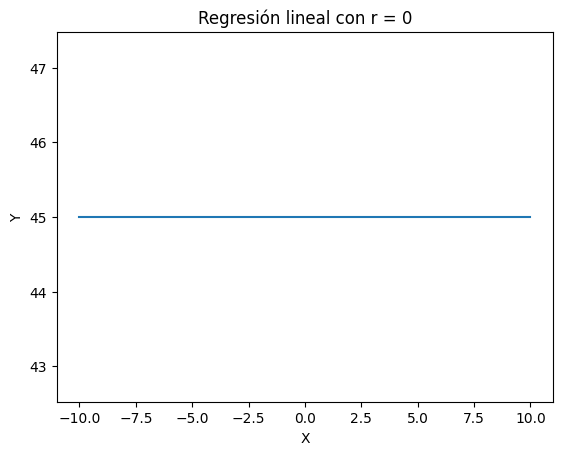

In [130]:
# Gráficos
# Definir el rango de x

x = np.linspace(-10, 10, 100)  # 100 puntos entre -10 y 10
y = lista_pendientes[0]* x + lista_ordenadas[0]

plt.plot(x, y)
plt.title(f"Regresión lineal con r = {conjunto_r[0]}")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

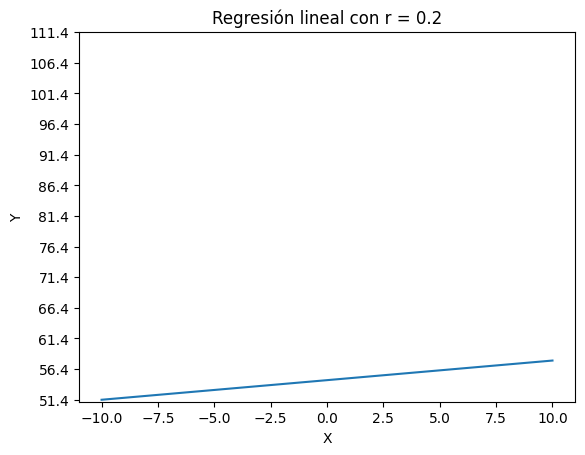

In [139]:
x = np.linspace(-10, 10, 100)  # 100 puntos entre -10 y 10
y = lista_pendientes[1]* x + lista_ordenadas[1]

plt.plot(x, y)
plt.title(f"Regresión lineal con r = {conjunto_r[1]}")
plt.xlabel("X")
plt.ylabel("Y")
plt.yticks(np.arange(min(y), 115, 5))
plt.show()

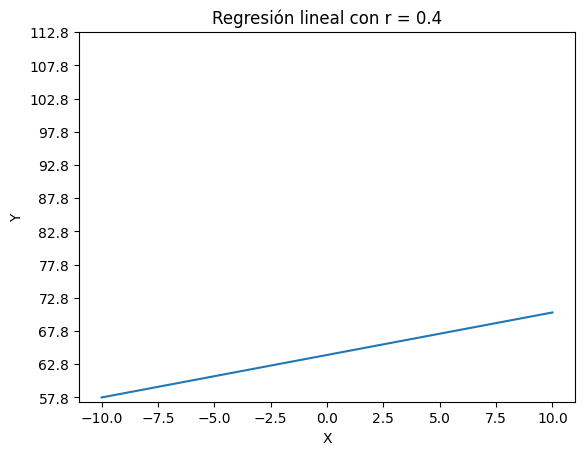

In [140]:
x = np.linspace(-10, 10, 100)  # 100 puntos entre -10 y 10
y = lista_pendientes[2]* x + lista_ordenadas[2]

plt.plot(x, y)
plt.title(f"Regresión lineal con r = {conjunto_r[2]}")
plt.xlabel("X")
plt.ylabel("Y")
plt.yticks(np.arange(min(y), 115, 5))
plt.show()

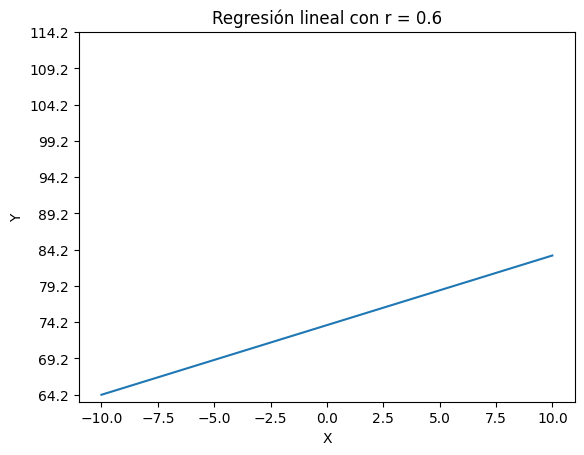

In [141]:
x = np.linspace(-10, 10, 100)  # 100 puntos entre -10 y 10
y = lista_pendientes[3]* x + lista_ordenadas[3]

plt.plot(x, y)
plt.title(f"Regresión lineal con r = {conjunto_r[3]}")
plt.xlabel("X")
plt.ylabel("Y")
plt.yticks(np.arange(min(y), 115, 5))
plt.show()

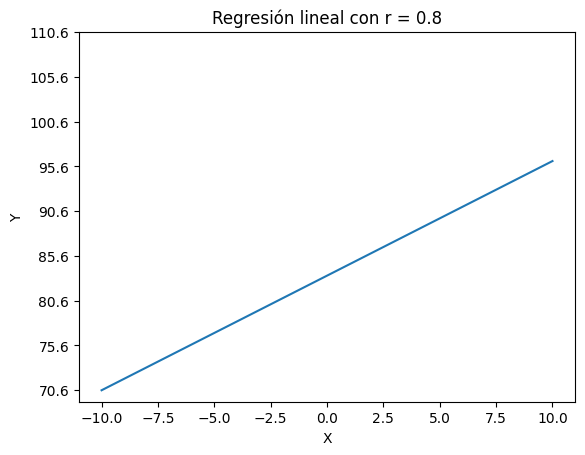

In [142]:
x = np.linspace(-10, 10, 100)  # 100 puntos entre -10 y 10
y = lista_pendientes[4]* x + lista_ordenadas[4]

plt.plot(x, y)
plt.title(f"Regresión lineal con r = {conjunto_r[4]}")
plt.xlabel("X")
plt.ylabel("Y")
plt.yticks(np.arange(min(y), 115, 5))
plt.show()

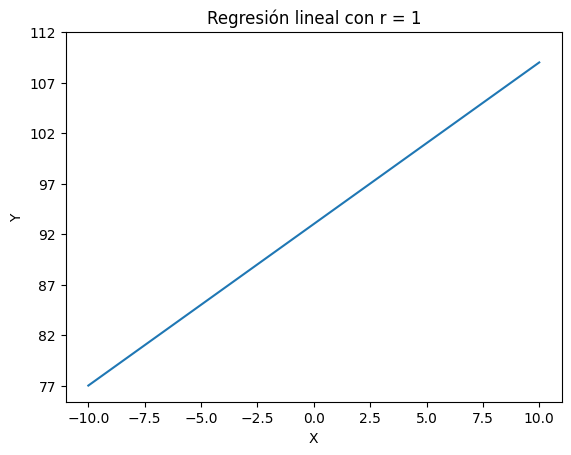

In [138]:
x = np.linspace(-10, 10, 100)  # 100 puntos entre -10 y 10
y = lista_pendientes[5]* x + lista_ordenadas[5]

plt.plot(x, y)
plt.title(f"Regresión lineal con r = {conjunto_r[5]}")
plt.xlabel("X")
plt.ylabel("Y")
plt.yticks(np.arange(min(y), 115, 5))
plt.show()

Cuánto más cerca de -1 o 1 el r, el ángulo de la recta con el eje x (o una linea paralela a ella) es mayor; hasta llegar a 45 grados.

## Ejercicio 6